In [1]:
from manim import *

Manim Community v0.16.0

In [2]:
config.media_width = "100%"
config.media_embed = True

In [3]:
%%manim -qm --disable_caching -v WARNING Ex1


class Ex1(Scene):
    
    def get_point_from_index(self, index):
        return self.list_point[index%self.base]
    
    def setup(self):
        self.base = 300
        self.times = 5
        self.main_circle = Circle(radius = 3)
        self.add(self.main_circle)
        self.list_point = [self.main_circle.point_from_proportion(i/self.base) for i in range(self.base)]
        # self.add(*self.list_point)
    
    def construct(self):
        def create_line(i):
            dot1 = self.get_point_from_index(i)
            dot2 = self.get_point_from_index(i*self.times)
            return Line(dot1, dot2, stroke_width=1)
        self.play(LaggedStart(
            *[
                Create(create_line(i)) for i in range(self.base)
            ], lag_ratio = 0.1, run_time=10))
        pass

21.1
6


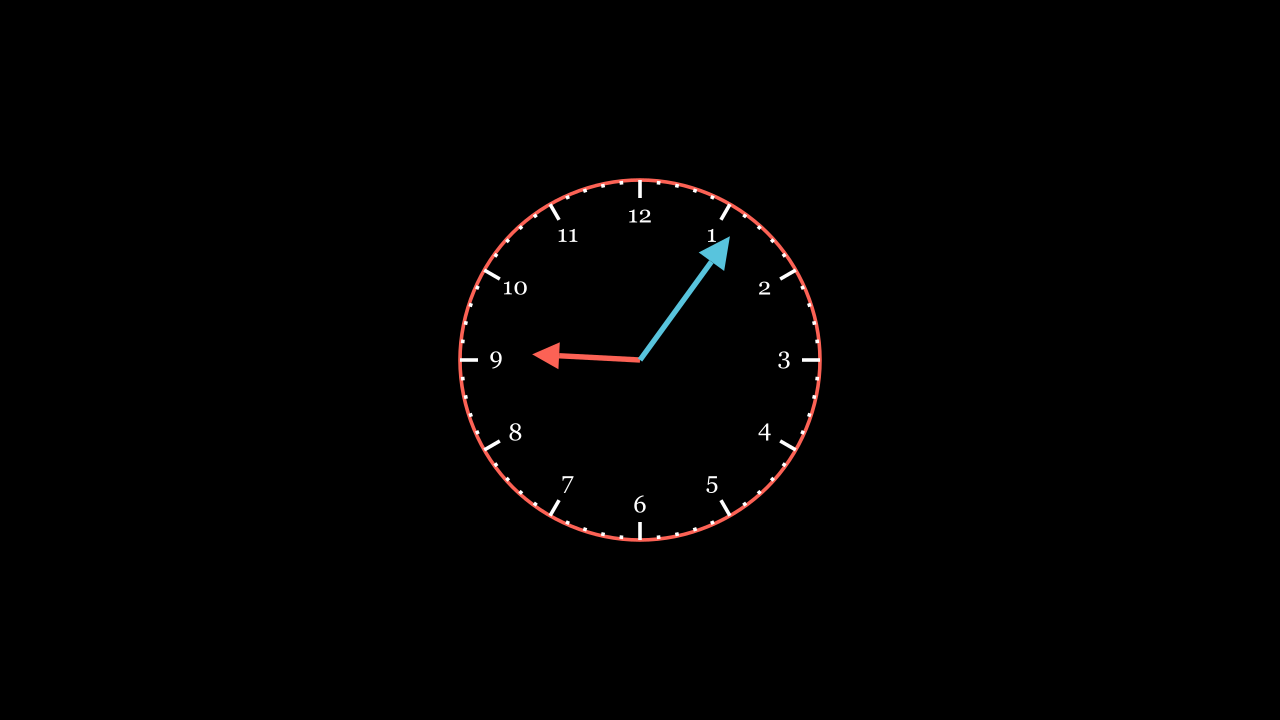

In [4]:
%%manim -qm -v WARNING -v WARNING Ex2
from datetime import datetime

class Ex2(Scene):
    def setup(self):
        self.now = datetime.now()
        self.hour = self.now.hour + self.now.minute/60
        self.minute = self.now.minute
        print(self.hour)
        print(self.minute)
        self.circle = Circle().scale(2).rotate(PI/2).flip(UP)
        self.add(self.circle)
        self.list_min = [self.circle.point_from_proportion(i/60) for i in range(60)]
        self.list_line = [Line(i, self.circle.get_center()) for i in self.list_min]
        self.add(*[line.get_subcurve(0, 0.1) if i%5==0 else line.get_subcurve(0, 0.02) for i, line in enumerate(self.list_line)])
        self.add(Arrow(self.circle.get_center(), self.list_line[0].point_from_proportion(0.4), buff=0).set_color(RED).rotate(-self.hour / 6 * PI, about_point=self.circle.get_center()))
        self.add(Arrow(self.circle.get_center(), self.list_line[0].point_from_proportion(0.15), buff=0).set_color(BLUE).rotate(-self.minute / 30 * PI, about_point=self.circle.get_center()))
        self.add(*[Text("{hour:.0f}".format(hour=12 if i==0 else i/5)).scale(0.4).move_to(line.point_from_proportion(0.2)) for i, line in enumerate(self.list_line) if i%5 == 0])
        
        

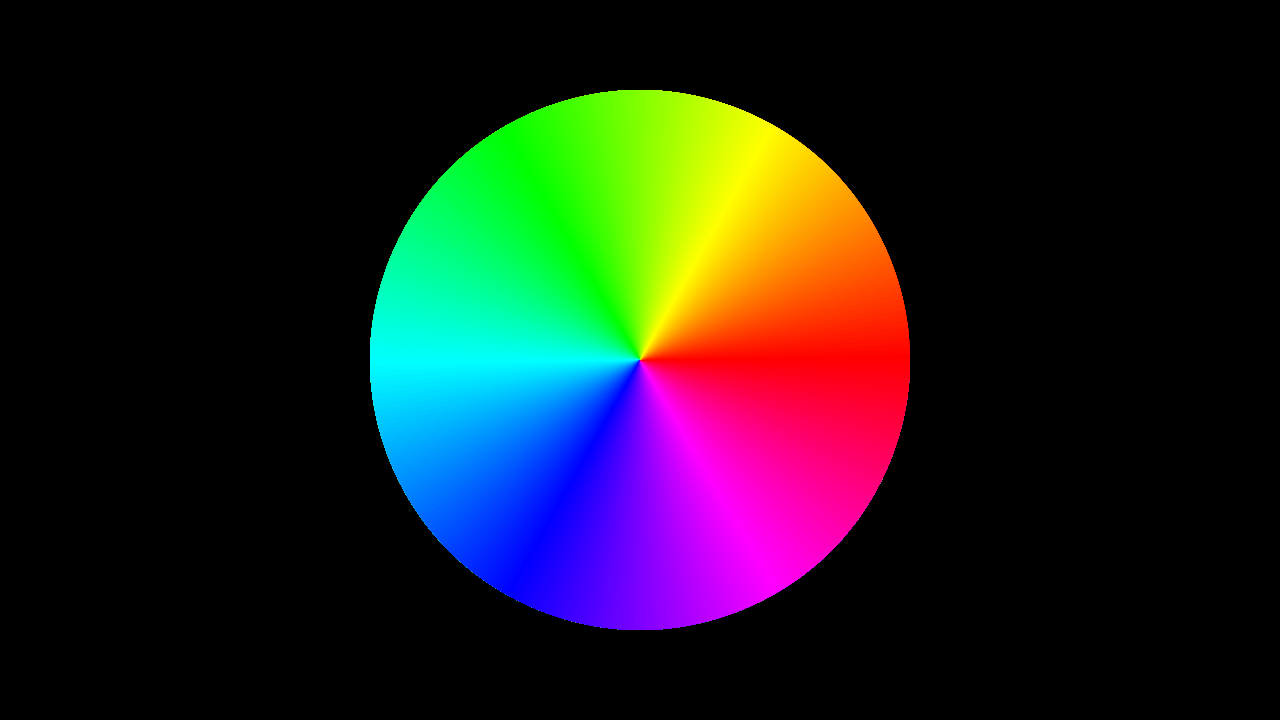

In [5]:
%%manim -qm -v WARNING Ex3

from colour import Color
def HSL(hue, saturation=1, lightness=0.5):
    return Color(hsl=(hue, saturation, lightness))

class Ex3(Scene):
    def setup(self):
        pass
    
    def get_slice(self, circle, i, color):
        obj = VMobject( stroke_width=0, fill_opacity=1)
        circular_arc = circle.get_subcurve(i, 1)
        line1 = VMobject().set_points_as_corners([circular_arc.get_start(), circle.get_center()])
        line2 = VMobject().set_points_as_corners([circular_arc.get_end(), circle.get_center()])
        obj.append_vectorized_mobject(line1)
        obj.append_vectorized_mobject(circular_arc)
        obj.append_vectorized_mobject(line2)
        obj.set_color(color)
        return obj
    
    def construct(self):
        partitions = 300
        circle = Circle(radius=3)
        slices = [self.get_slice(circle, i/partitions, HSL(i/partitions)) for i in range(partitions)]
        self.add(*slices)

In [6]:
%%manim -qm --fps=30 --disable_caching -v WARNING Example
class Example(Scene):
    def construct(self):
        formula = MathTex("x","=","y","+","3").scale(4)
        # circles use buffer_factor
        sm1 = Circle().surround(formula[0]) # buffer_factor=1.2) by default
        sm2 = Circle().surround(formula[1],buffer_factor=1) 
        # other shapes use buff
        sm3 = Rectangle(color=YELLOW).surround(formula[2],stretch=True,buff=0) # To fix the ratio
        sm4 = Rectangle(color=TEAL).surround(formula[2])

        self.add(
            formula,
        )
        self.play(ShowPassingFlash(sm1))
        self.play(ShowPassingFlash(sm2,time_width=0.5))
        self.play(ShowPassingFlash(sm3,time_width=1,run_time=2,rate_func=linear))
        self.play(ShowCreationThenFadeOut(sm4))
        self.wait()

[08/03/22 21:06:57] WARNING  The class ShowCreationThenFadeOut has been deprecated since v0.15.0 ]8;id=335233;file://D:\python\manim\manim_test\lib\site-packages\manim\utils\deprecation.py\deprecation.py]8;;\:]8;id=449403;file://D:\python\manim\manim_test\lib\site-packages\manim\utils\deprecation.py#218\218]8;;\
                             and is expected to be removed after v0.16.0. Use Create then                          
                             FadeOut to achieve this effect.                                                       